In [1]:
### Make vediagrams for cohorts. 
import pandas as pd 
import os
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn.layout.venn3 import cost_based


### Start with TGCA-OV

In [2]:
# Load up all the data! 
def get_patient_ids_from_slides(directory):
    patient_ids = set()
    for filename in os.listdir(directory):
        if filename.endswith('.svs'):  # Filter only .svs files
            # Split the filename by '-' and take the first three parts
            patient_id = '-'.join(filename.split('-')[:3])
            patient_ids.add(patient_id)
    return patient_ids

# Example usage:
directory = "/tank/WSI_data/Ovarian_WSIs/TCGA-OV/FFPE_slides"
WSI_patient_ids = get_patient_ids_from_slides(directory)

# Now do the RNA seq data for patients with Chemo therapy ...  
RNA_patient_ids = pd.read_csv("/mnt/ncshare/ozkilim/Histopathology/projects/Ovarian_HRD_pred/RNA_seq/pre_proc/RNA_Seq_dfs/TCGA.csv")
RNA_patient_ids = set(RNA_patient_ids['case_id'])

# patients_response need to check the patients we have resonse/pfs data for ... 
clinical = pd.read_excel("/mnt/ncshare/ozkilim/Histopathology/projects/BRCA/data/TCGA_metadata/TCGA-CDR-SupplementalTableS1.xlsx")
clinical = clinical[clinical['type'] =="OV"]
clinical = clinical.dropna(subset=['PFI', 'PFI.time'])
patients_response = set(clinical['bcr_patient_barcode'])

In [3]:
patients_response

{'TCGA-04-1331',
 'TCGA-04-1332',
 'TCGA-04-1335',
 'TCGA-04-1336',
 'TCGA-04-1337',
 'TCGA-04-1338',
 'TCGA-04-1341',
 'TCGA-04-1342',
 'TCGA-04-1343',
 'TCGA-04-1346',
 'TCGA-04-1347',
 'TCGA-04-1348',
 'TCGA-04-1349',
 'TCGA-04-1350',
 'TCGA-04-1351',
 'TCGA-04-1353',
 'TCGA-04-1356',
 'TCGA-04-1361',
 'TCGA-04-1362',
 'TCGA-04-1364',
 'TCGA-04-1365',
 'TCGA-04-1367',
 'TCGA-04-1369',
 'TCGA-04-1370',
 'TCGA-04-1371',
 'TCGA-04-1514',
 'TCGA-04-1516',
 'TCGA-04-1517',
 'TCGA-04-1519',
 'TCGA-04-1525',
 'TCGA-04-1530',
 'TCGA-04-1536',
 'TCGA-04-1542',
 'TCGA-04-1638',
 'TCGA-04-1644',
 'TCGA-04-1646',
 'TCGA-04-1648',
 'TCGA-04-1649',
 'TCGA-04-1651',
 'TCGA-04-1652',
 'TCGA-04-1654',
 'TCGA-04-1655',
 'TCGA-09-0364',
 'TCGA-09-0365',
 'TCGA-09-0366',
 'TCGA-09-0367',
 'TCGA-09-0369',
 'TCGA-09-1659',
 'TCGA-09-1661',
 'TCGA-09-1662',
 'TCGA-09-1664',
 'TCGA-09-1665',
 'TCGA-09-1666',
 'TCGA-09-1667',
 'TCGA-09-1668',
 'TCGA-09-1669',
 'TCGA-09-1670',
 'TCGA-09-1672',
 'TCGA-09-1673

(<matplotlib.patches.Circle at 0x7f77b38afcd0>,
 <matplotlib.patches.Circle at 0x7f77b36811d0>)

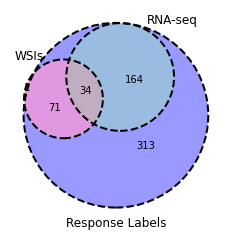

In [4]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt


venn = venn3([WSI_patient_ids, RNA_patient_ids, patients_response], ('WSIs', 'RNA-seq', 'Response Labels'),layout_algorithm=cost_based.LayoutAlgorithm())
# Optional: Add dashed circles for aesthetics
venn3_circles([WSI_patient_ids, RNA_patient_ids, patients_response], linestyle='dashed',layout_algorithm=cost_based.LayoutAlgorithm())

#the issue is that the RNA seq are nor overlapping well with the WSIs... --> try to joint he CPTAC WSIs into this set?....m 


# TODO: link CPTAC WSIs to the patients...  this maybe the key.... to enlarging the train set... then test on HGSOC... maybe HGSOC just a larger set..
# 
# 
# 
# 
#  

47


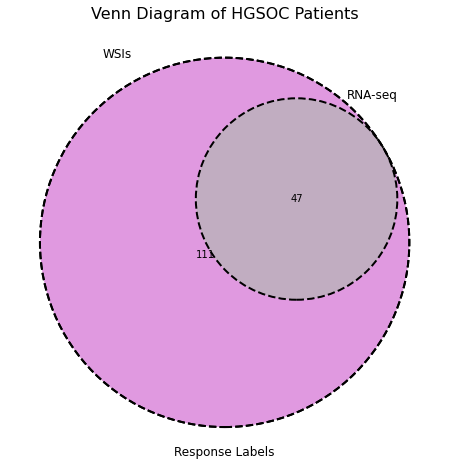

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrames
HGSOC = pd.read_excel("/mnt/ncshare/ozkilim/Histopathology/projects/BRCA/data/HGSOC_processed_data/PTRC-HGSOC_List_clincal_data.xlsx")
HGSOC_RNA = pd.read_csv("/mnt/ncshare/ozkilim/Histopathology/projects/Ovarian_HRD_pred/RNA_seq/pre_proc/RNA_Seq_dfs/HGSOC.csv")

# Clean and process the sets
HGSOC_WSIs = {
    str(patient_id).strip()  # Convert to string and strip whitespace
    for patient_id in HGSOC[HGSOC['File Name'].notna()]['Patient ID']
}

HGSOC_RNA = {
    str(case_id).strip()
    for case_id in HGSOC_RNA['case_id']
}

print(len(HGSOC_RNA)) # multple samples per patient?... is it from both turmor for example?... 

HGSOC_response = {
    str(patient_id).strip()
    for patient_id in HGSOC[HGSOC['Tumor response'].notna()]['Patient ID']
}

# Ensure uniqueness by using sets
assert isinstance(HGSOC_WSIs, set)
assert isinstance(HGSOC_RNA, set)
assert isinstance(HGSOC_response, set)

# Plot Venn Diagram
plt.figure(figsize=(8, 8))
venn = venn3([HGSOC_WSIs, HGSOC_RNA, HGSOC_response], ('WSIs', 'RNA-seq', 'Response Labels'),layout_algorithm=cost_based.LayoutAlgorithm())
venn3_circles([HGSOC_WSIs, HGSOC_RNA, HGSOC_response], linestyle='dashed',layout_algorithm=cost_based.LayoutAlgorithm())

# Add a title
plt.title("Venn Diagram of HGSOC Patients", fontsize=16)

# Display the plot
plt.show()

In [17]:
# No more RNA seq data?...  really?...  do the sample MSK SPECTRUM? 

RNA_Test = {
    str(patient_id).strip()  # Convert to string and strip whitespace
    for patient_id in HGSOC[HGSOC['Sample ID'].notna()]['Patient ID']
}

len(set(RNA_Test)) #158  nbo this is just samples... not RNA seq ... 

158

In [18]:
HGSOC.head() 

,File Name,Patient ID,Sample Source,Sample ID,Image Name,Image ID,Patient Age,Patient Ethnicity,Patient Race,Neo-adjuvant,Other cancer diagnosis?,Tumor response,Tumor type,Tumor location,Tumor Location Group,Tumor Grade,Tumor Stage,Tumor Substage,Sample type
0,1009402_171069_ImageActual,2,FHCRC,205927,1009402,171069,73,Not Hispanic or Latino,White,no,NaN,refractory,Metastatic,Omentum,OM,3,III,IIIC,FFPE
1,1009403_171101_ImageActual,2,FHCRC,205927,1009403,171101,73,Not Hispanic or Latino,White,no,NaN,refractory,Metastatic,Omentum,OM,3,III,IIIC,FFPE
2,1009404_171121_ImageActual,4,FHCRC,206053,1009404,171121,60,NaN,NaN,no,NaN,sensitive,Primary,Ovary - Left,OV,2,III,IIIC,FFPE
3,1009405_416622_ImageActual,4,FHCRC,206053,1009405,416622,60,NaN,NaN,no,NaN,sensitive,Primary,Ovary - Left,OV,2,III,IIIC,FFPE
4,1009406_171004_ImageActual,7,FHCRC,206382,1009406,171004,52,Not Hispanic or Latino,NaN,no,NaN,refractory,Primary,Ovary - Left,OV,3,III,IIIC,FFPE


In [19]:
len(HGSOC_RNA) 47?... not 106....? ... why sugddenly smller int his cohort?...  --> take original df with patients to rna seq samples ... 

understand who the WSIs are for .... 



is there a link in zhang to TCGA? ... 



47

In [ ]:
# now do this for all cohorts?...